# Projeto facerecog

-----------------------

# Importação de pacotes

In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pytesseract
import itertools
import csv
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

""" image trasformation packages """
from PIL import Image
import skimage.io as skio
from skimage.util import dtype_limits
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import rank
from skimage.measure import compare_ssim, compare_mse

""" statistical data visualization packages"""
import seaborn as sns

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import mse, compare_images, load_image, save_image, plot_captchas, save_images, crop_char, feed_char_dict, ler_letras, checar_combinacoes, remove_small_blobs, run_tesseract

----------------------------

# Leitura das imagens iniciais funções de suporte

In [3]:
img_files = sorted(glob('../imagens/imageGenerator*.jpg'))
#print(img_files)
imgs = skio.imread_collection(img_files)
print(imgs.files)

['../imagens/imageGenerator1.jpg', '../imagens/imageGenerator10.jpg', '../imagens/imageGenerator2.jpg', '../imagens/imageGenerator3.jpg', '../imagens/imageGenerator4.jpg', '../imagens/imageGenerator5.jpg', '../imagens/imageGenerator6.jpg', '../imagens/imageGenerator7.jpg', '../imagens/imageGenerator9.jpg']


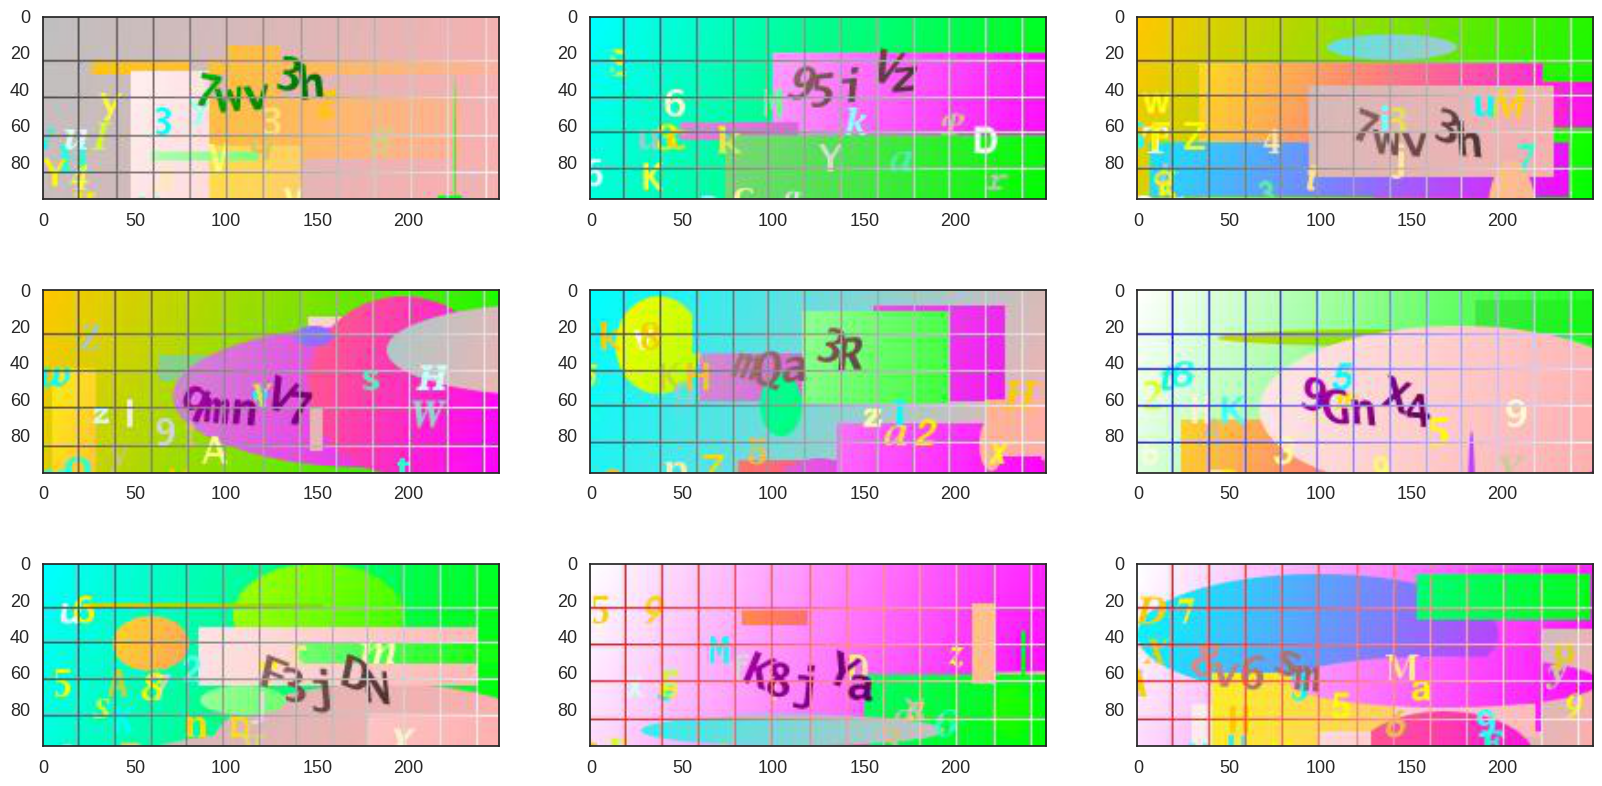

In [4]:
plot_captchas(imgs, (3,3))

In [5]:
colored = imgs[-1].copy()

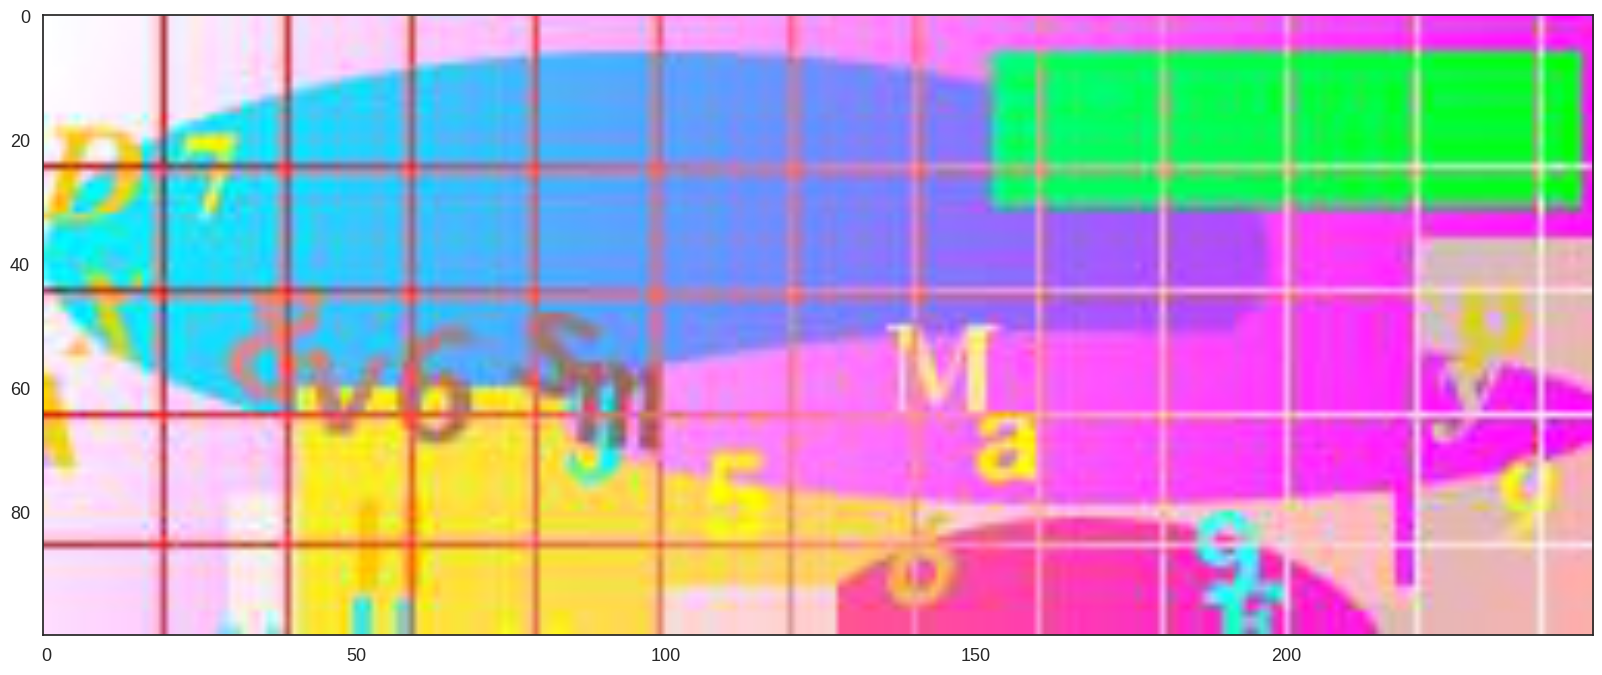

In [6]:
plt.imshow(colored)

In [7]:
colored.shape

(100, 250, 3)

In [8]:
colored.min(), colored.max()

(0, 255)

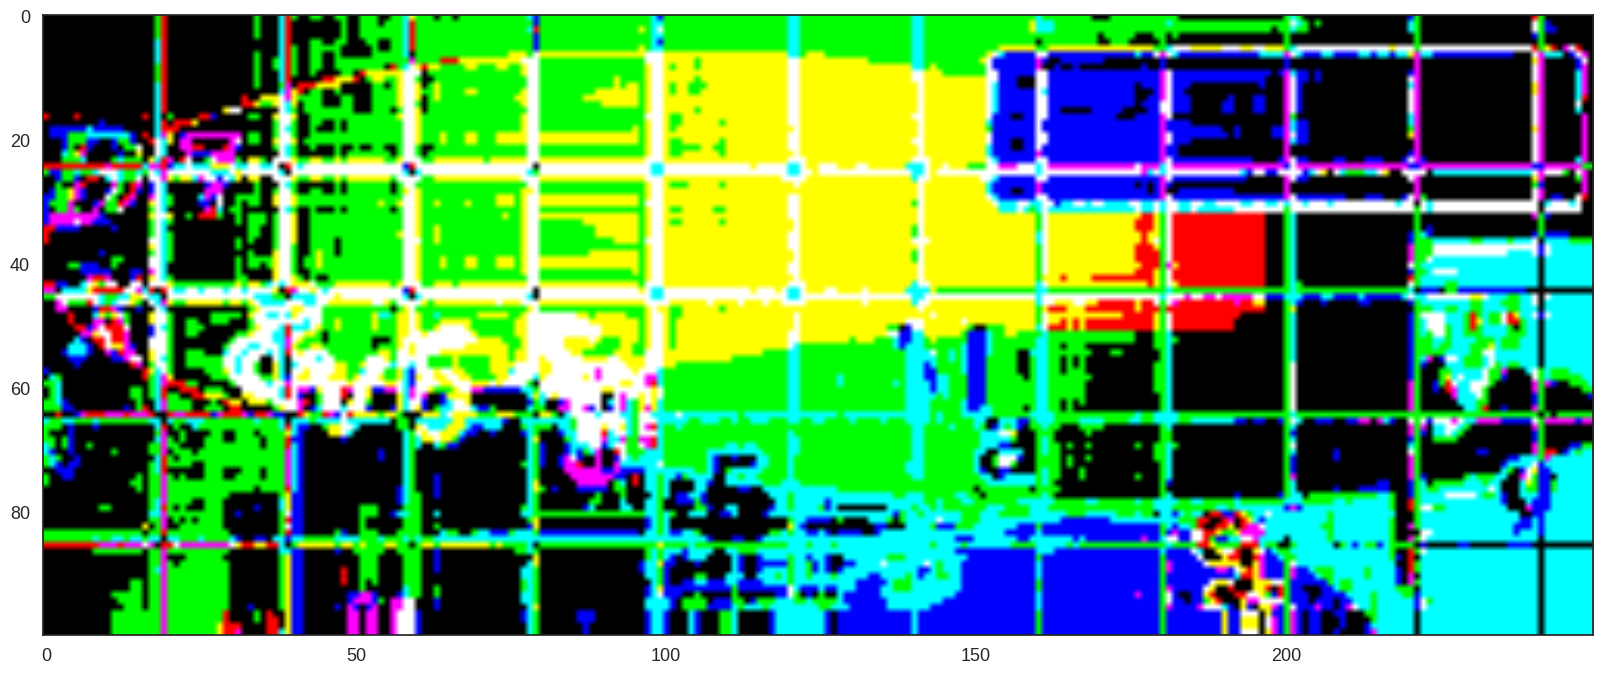

In [11]:
plt.imshow(colored < colored.mean())

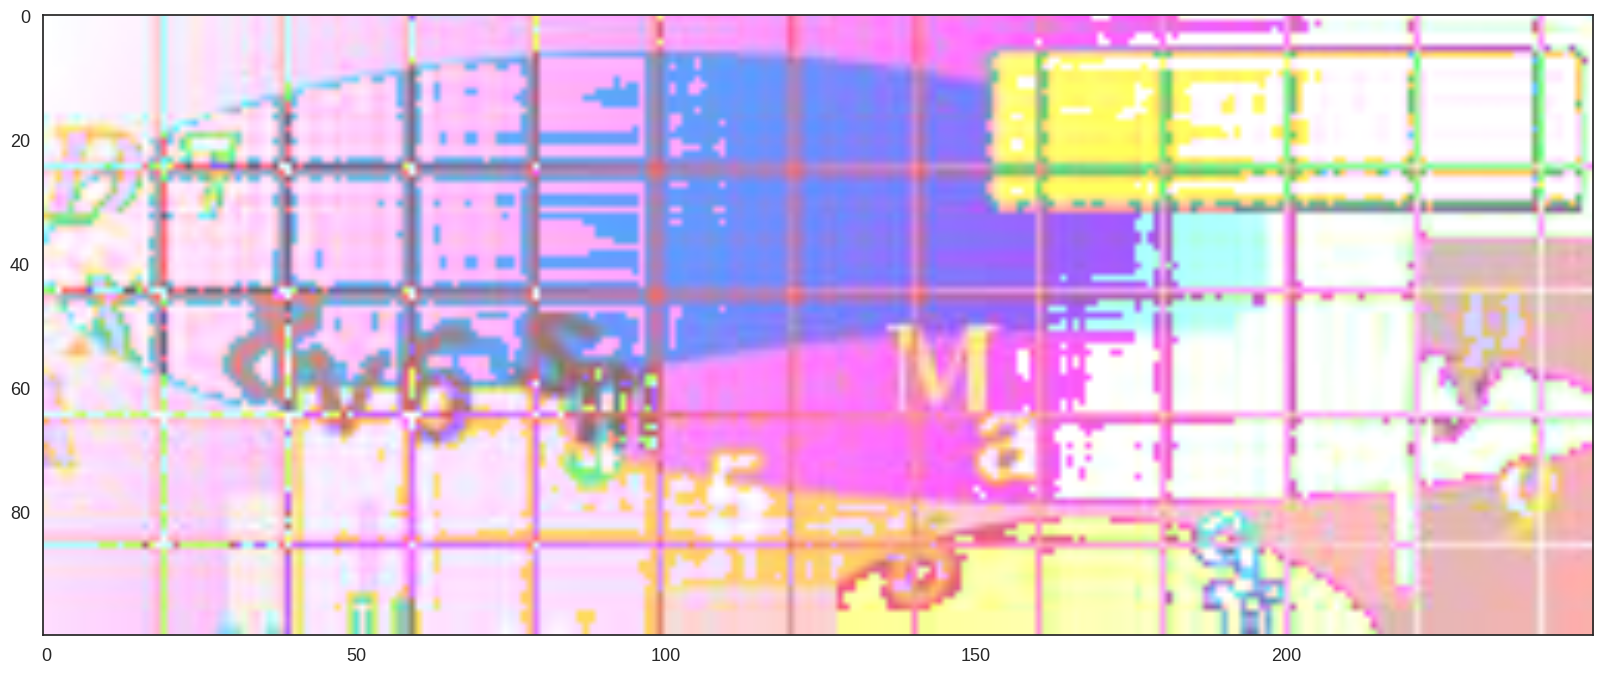

In [10]:
mask = colored < 87

colored[mask] = 255
plt.imshow(colored)

# Fltro nas imagens
def filter_captcha2(bw_img, min_area=10, **label_kwargs):
    """ Remove small blobs in the bw img. """
    labels = label(bw_img, **label_kwargs)

    # pick the background and foreground colors
    bg = label_kwargs.get('background', 0)
    fg = dtype_limits(bw_img, clip_negative=True)[1] - bg

    # create an empty image
    new_bw = np.ones_like(bw_img) * bg

    # check the area of each region
    for roi in regionprops(labels):
        if roi.area >= min_area:
            new_bw[labels == roi.label] = fg

    return new_bw

unblobbed = [filter_captcha2(img, min_area=50, background=255) for img in imgs]
#plot_captchas(unblobbed, (4, 5))